In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS_Projects/Reviews.csv')
mdf = df.sample(n=6500, random_state=42)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DS_Projects/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [ ]:
data['Sentiment'].head()

,Sentiment
0,positive
1,negative
2,positive
3,neutral
4,neutral


### Exploratory Data Analysis

In [ ]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6500 entries, 165256 to 475349
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      6500 non-null   int64 
 1   ProductId               6500 non-null   object
 2   UserId                  6500 non-null   object
 3   ProfileName             6500 non-null   object
 4   HelpfulnessNumerator    6500 non-null   int64 
 5   HelpfulnessDenominator  6500 non-null   int64 
 6   Score                   6500 non-null   int64 
 7   Time                    6500 non-null   int64 
 8   Summary                 6499 non-null   object
 9   Text                    6500 non-null   object
dtypes: int64(5), object(5)
memory usage: 558.6+ KB


In [ ]:
mdf.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,6500.000000,6500.000000,6500.000000,6500.000000,6.500000e+03
mean,284992.483385,1.695077,2.161385,4.199538,1.295865e+09
std,165737.504854,6.388288,6.926645,1.296616,4.826197e+07
min,54.000000,0.000000,0.000000,1.000000,1.067904e+09
25%,144049.250000,0.000000,0.000000,4.000000,1.269799e+09
50%,282193.000000,0.000000,1.000000,5.000000,1.310688e+09
75%,430068.500000,2.000000,2.000000,5.000000,1.332893e+09
max,568354.000000,321.000000,322.000000,5.000000,1.351210e+09


In [ ]:
mdf.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,0
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,1
Text,0


In [ ]:
mdf.dropna(axis=0,inplace=True)

In [ ]:
mdf.shape

(6499, 10)

In [ ]:
mdf['Text'].head()

,Text
165256,"Having tried a couple of other brands of gluten-free sandwich cookies, these are the best of the bunch. They're crunchy and true to the texture of the other ""real"" cookies that aren't gluten-free. Some might think that the filling makes them a bit too sweet, but for me that just means I've satisfied my sweet tooth sooner! The chocolate version from Glutino is just as good and has a true ""chocolatey"" taste - something that isn't there with the other gluten-free brands out there."
231465,"My cat loves these treats. If ever I can't find her in the house, I just pop the top and she bolts out of wherever she was hiding to come get a treat. She doesn't like crunchy treats much, so these are perfect for her. I've given her all three flavors and she seems to like them all equally. They do tend to dry out by the time I near the end of the bottle, however. The flip-top lid is very handy. Very nice, inexpensive kitty treats. I have yet to meet a cat that doesn't just love these!"
427827,A little less than I expected. It tends to have a muddy taste - not what I expected since they said it was the favorite of the company.
433954,"First there was Frosted Mini-Wheats, in original size, then there was Frosted Mini-Wheats Bite Size. Well, if for some reason those were too much of a mouthful, we now have Frosted Mini-Wheats Little Bits. Yes, these are about half the size of the Bite Size versions. This particular one is ""Cinnamon Roll"".<br /><br />There is nothing new to the table here with the exception of size, which I is unnecessary. Personally, I like original flavor and size the best. But the Bite Size edition were accommodating. These come off as a desperate attempt to give attention to a brand that needs some sort of life put back into it and all they came up with was making them smaller and having a new flavor, which is actually too sweet for me.<br /><br />A serving size is approximately 47 biscuits. Thats 1 gram of polyunsaturated fat, 46 grams of carbohydrates, 6g fiber, 12g of sugar, 5g of protein and 200mg of potassium. Generally they look good but I guess those that are watching their carb intake might want to be careful.<br /><br />These probably fit on a spoon better than its predecessors in a bowl of milk, but I like the other kinds cause they snack better without the milk. But here, these small ones are easily to snack more than you should.<br /><br />I am grading this product 2 stars for 3 reasons 1) I dont think making them smaller has any reason for existing outside of Kellogs filling the shelves with more versions of something that was fine to begin with. 2) This flavor, Cinnamon Roll, is sweet and has a synthetic taste to it. 3) On the plus side, I like Mini-Wheats in general, so it saved it from being one star."
70260,"and I want to congratulate the graphic artist for putting the entire product name on such a small box. The ad men must have really thought long and hard.<br /><br />But seriously, I love the product. The taste was refreshing and I thought that the taste was pleasing with no aftertaste. Not too sweet and Goldilocks would have stopped right there if there was a choice of 3. Easy to use as you just pour the contents into a 16 oz bottle of water and shake. Mixed well, no granulation, you really couldn't ask for anything more and Lipton like a good drug dealer knows what they are doing, give me a taste for free and have me for life. 5 stars."


#### Preprocess the Reviews

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the lemmatizer and stop words list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize and lemmatize
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing to the review text
mdf['cleaned_text'] = mdf['Text'].apply(preprocess_text)
print(mdf['cleaned_text'].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


165256    tried couple brand glutenfree sandwich cooky b...
231465    cat love treat ever cant find house pop top bo...
427827    little le expected tends muddy taste expected ...
433954    first frosted miniwheats original size frosted...
70260     want congratulate graphic artist putting entir...
Name: cleaned_text, dtype: object


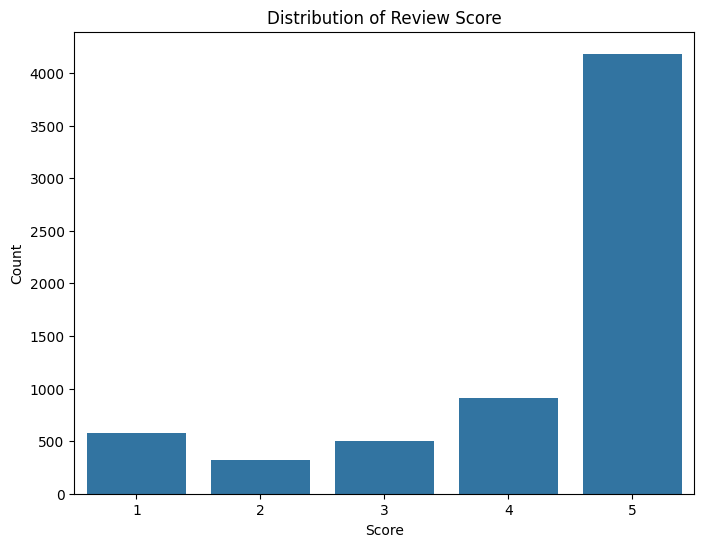

In [ ]:
 # Plot the distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='Score', data=mdf)
plt.title('Distribution of Review Score')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

### Creating Wordcloud

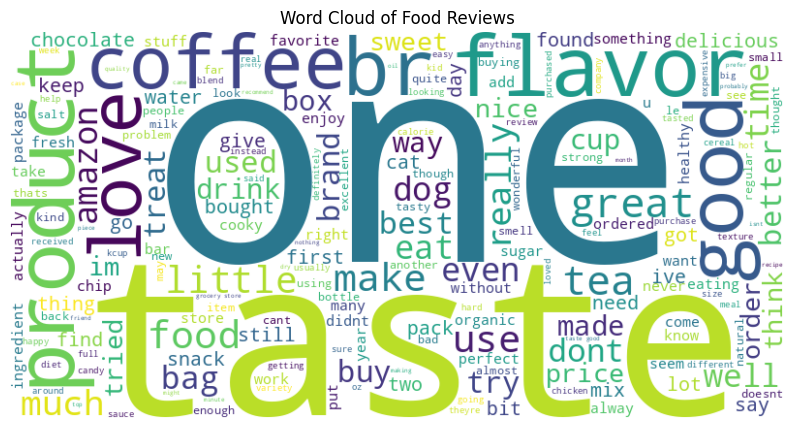

In [ ]:
from wordcloud import WordCloud

# Combine all cleaned reviews into a single string
all_reviews = ' '.join(mdf['cleaned_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Food Reviews')
plt.show()

### Observe the common words in positive and negative reviews

In [ ]:
pos_rev = mdf.loc[mdf['Score'] >= 4, 'cleaned_text']
neg_rev = mdf.loc[mdf['Score'] <= 2, 'cleaned_text']

In [ ]:
# Combine the reviews into single strings
pos_rev = ' '.join(pos_rev)
neg_rev = ' '.join(neg_rev)

In [ ]:
# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(pos_rev)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neg_rev)


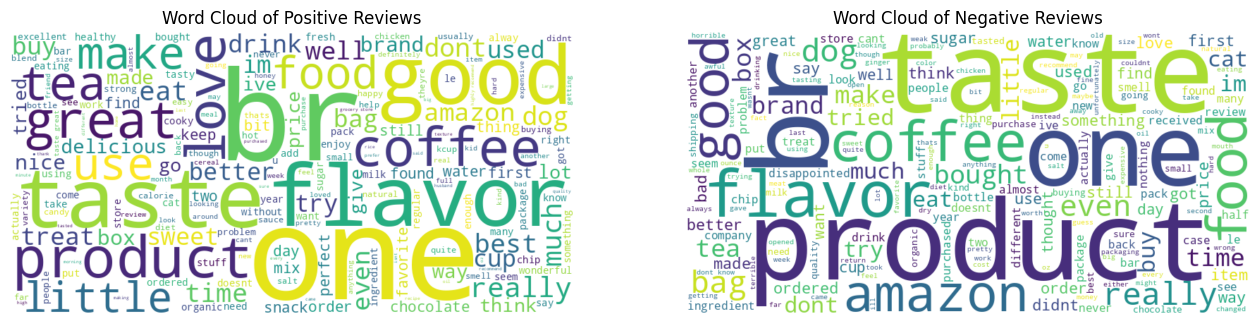

In [ ]:
# Plot the word clouds
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].imshow(positive_wordcloud, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Word Cloud of Positive Reviews')

axes[1].imshow(negative_wordcloud, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Cloud of Negative Reviews')

plt.show()

### Sentiment Analysis Using Vader

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)

# Apply the sentiment analyzer to the review text
mdf['vader_scores'] = mdf['cleaned_text'].apply(get_sentiment_scores)

# Extract compound score as the overall sentiment score
mdf['vader_compound'] = mdf['vader_scores'].apply(lambda score_dict: score_dict['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


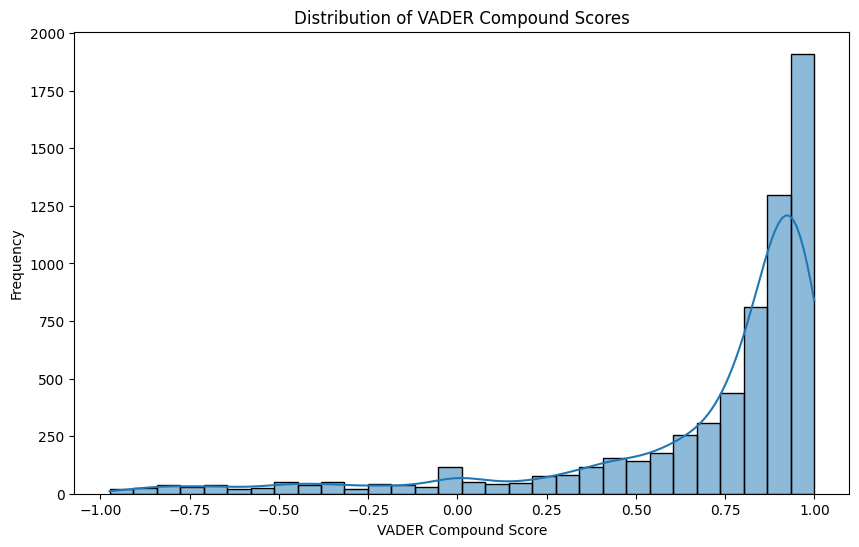

In [ ]:
# Plot the distribution of VADER compound scores
plt.figure(figsize=(10, 6))
sns.histplot(mdf['vader_compound'], bins=30, kde=True)
plt.title('Distribution of VADER Compound Scores')
plt.xlabel('VADER Compound Score')
plt.ylabel('Frequency')
plt.show()

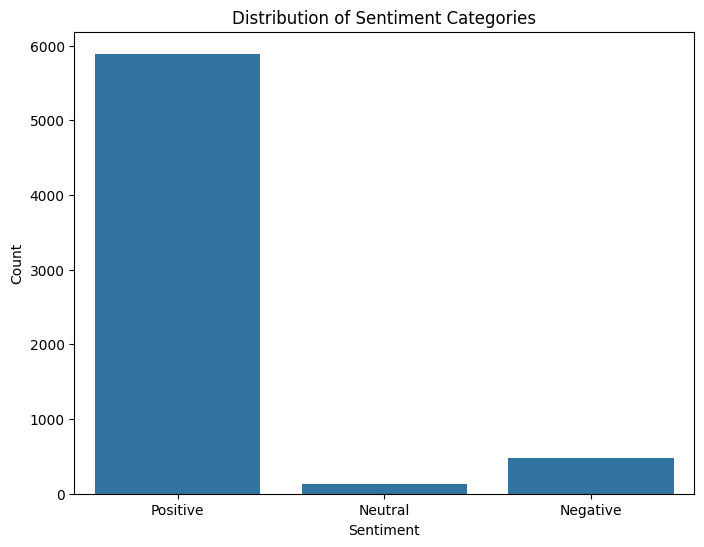

In [ ]:
# Function to categorize sentiment
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply categorization
mdf['vader_sentiment'] = mdf['vader_compound'].apply(categorize_sentiment)

# Plot the count of each sentiment category
plt.figure(figsize=(8, 6))
sns.countplot(x='vader_sentiment', data=mdf, order=['Positive', 'Neutral', 'Negative'])
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


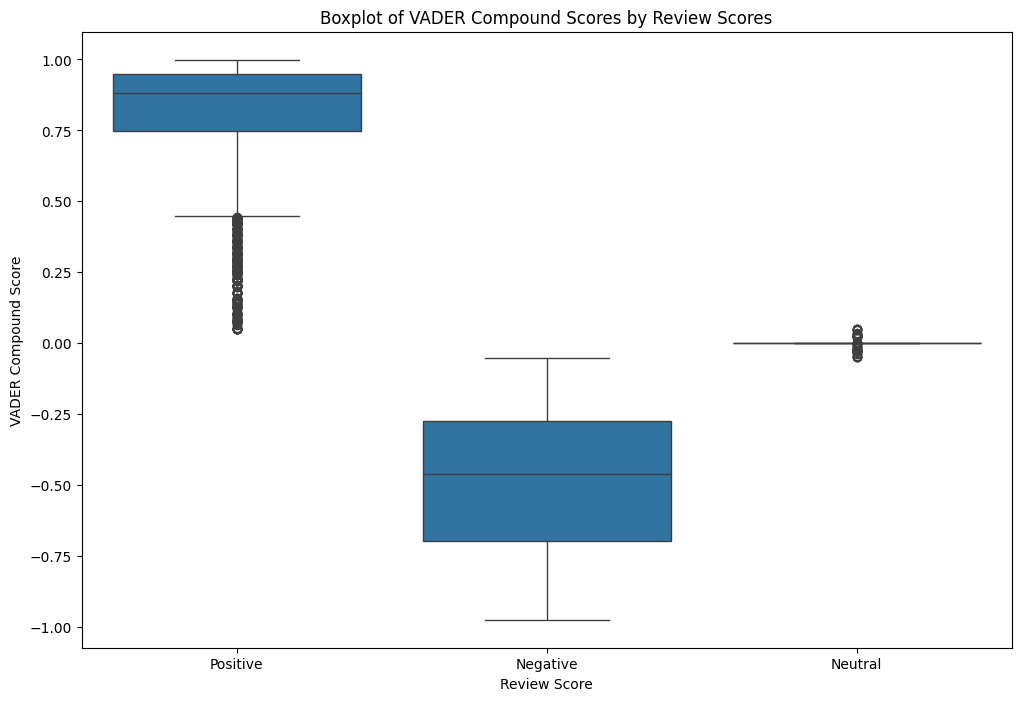

In [ ]:
# Plot a boxplot of VADER compound scores by review ratings
plt.figure(figsize=(12, 8))
sns.boxplot(x='vader_sentiment', y='vader_compound', data=mdf)
plt.title('Boxplot of VADER Compound Scores by Review Scores')
plt.xlabel('Review Score')
plt.ylabel('VADER Compound Score')
plt.show()
